In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tkinter import *
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,  
NavigationToolbar2Tk) 

In [8]:
realBounds=(-0.22, -0.219), imagBounds=(-0.7,-0.699)

SyntaxError: cannot assign to operator (<ipython-input-8-ccf06f7ad0a2>, line 1)

In [9]:
# counts the number of iterations until the function diverges or
# returns the iteration threshold that we check until
def countIterationsUntilDivergent(c, threshold):
    z = complex(0, 0)
    for iteration in range(threshold):
        z = (z*z) + c
        if abs(z) > 4:
            break
            pass
        pass
    return iteration
# takes the iteration limit before declaring function as convergent and
# takes the density of the atlas

# create atlas, plot mandelbrot set, display set
def mandelbrot(threshold, density, zoomLevel=0, zoomFocus=(121.38500005/300,121.3805/300), realBounds=(-2.25, 0.75), imagBounds=(-1.5,1.5)):
    # location and size of the atlas rectangle
    # realAxis = np.linspace(-2.25, 0.75, density)
    # imaginaryAxis = np.linspace(-1.5, 1.5, density)
    
    zoomFac = 2 #speed of the zoom
    
    # Get the zoom box
    if zoomLevel==0:
        realZoomBounds = realBounds
        imagZoomBounds = imagBounds
    else:
        realWidth = (realBounds[1] - realBounds[0])
        realCenter = realWidth * zoomFocus[0] + realBounds[0]
        realZoomWidth = realWidth / (zoomFac**(zoomLevel - 1))
        realZoomBounds = (realCenter-realZoomWidth/2, realCenter+realZoomWidth/2)

        imagWidth = (imagBounds[1] - imagBounds[0])
        imagCenter = imagWidth * zoomFocus[1] + imagBounds[0]
        imagZoomWidth = imagWidth / (zoomFac**(zoomLevel - 1))
        imagZoomBounds = (imagCenter-imagZoomWidth/2, imagCenter+imagZoomWidth/2)
        
    
    realAxis = np.linspace(realZoomBounds[0], realZoomBounds[1], density)
    imaginaryAxis = np.linspace(imagZoomBounds[0], imagZoomBounds[1], density)
    realAxisLen = len(realAxis)
    imaginaryAxisLen = len(imaginaryAxis)
    # 2-D array to represent mandelbrot atlas
    atlas = np.empty((realAxisLen, imaginaryAxisLen))
    # color each point in the atlas depending on the iteration count
    for ix in range(realAxisLen):
        for iy in range(imaginaryAxisLen):
            cx = realAxis[ix]
            cy = imaginaryAxis[iy]
            c = complex(cx, cy)
            atlas[ix, iy] = countIterationsUntilDivergent(c, threshold)
            pass
        pass
    f = plt.Figure()
    a = f.add_subplot(111)

    # plot and display mandelbrot set
    a.imshow(np.log(atlas.T), interpolation="nearest", cmap=plt.get_cmap('plasma'))
    return f

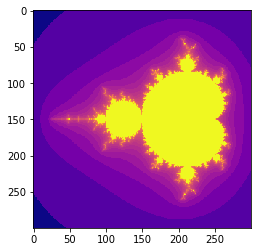

In [10]:
#### time to party!!
mandelbrot(120,300,zoomFocus=(121.38500005/300,121.3805/300),zoomLevel=0)

In [11]:
zoomCounter = 0 
def zoom_plus(): # without event because I use `command=` instead of `bind`
    global zoomCounter
    zoomCounter = zoomCounter + 1
    
    plot_mandelbrot()
    

def zoom_minus(): # without event because I use `command=` instead of `bind`
    global zoomCounter
    zoomCounter = zoomCounter - 1
    if zoomCounter < 0:
        zoomCounter = 0

    plot_mandelbrot()
    
    
def close_window():
    window.destroy()
    
def plot_mandelbrot():
    global zoomCounter
    
    f = mandelbrot(150,300,zoomLevel=zoomCounter)
    
    # creating the Tkinter canvas 
    # containing the Matplotlib figure 
    canvas = FigureCanvasTkAgg(f,master = window)   
    canvas.draw() 
  
    # placing the canvas on the Tkinter window 
    canvas.get_tk_widget().grid(row=4,columnspan=2) 
  
    ## creating the Matplotlib toolbar 
    #toolbar = NavigationToolbar2Tk(canvas, 
    #                               window) 
    #toolbar.update() 
  
    # placing the toolbar on the Tkinter window 
    #canvas.get_tk_widget().grid(row=3,columnspan=2) 

In [16]:
global zoomCounter
zoomCounter = 0

window = Tk()
window.title("Fractals")
window.configure(background="black")

label1 = Label (window, text= "Choose Fractal Type:", \
                bg="black", fg="white", font="none 20 bold").grid(row=0, column=0, columnspan=2, sticky=E)

buttonJ = Button(window,text = 'Julia', command=close_window).grid(row=1, column=0)
buttonM = Button(window,text = 'mandlebrot', command=plot_mandelbrot).grid(row=1, column=1)

buttonplus = Button(window, text = '+', command=zoom_plus).grid(row=1, column=2)
buttonminus = Button(window, text = '-', command=zoom_minus).grid(row=2, column=2)

#canvas = FigureCanvasTkAgg(f, master=window)
#canvas.draw()
#canvas.get_tk_widget().pack(side="top", fill="both", expand=1)
#canvas._tkcanvas.pack(side="top", fill="both", expand=1)

window.mainloop()